# Zoiberg-2.0 Bootstrap

In [185]:
# Just to make sure my RAM doesn't explode, clears all variables in memory
%reset

## Imports
---

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
plt.rcParams.update({'font.size': 22})

In [188]:
df_train = pd.read_csv('./mnist_train.csv', header=None)
df_test = pd.read_csv('./mnist_test.csv', header=None)

In [189]:
print(f'Train set shape: {df_train.shape}')
print(f'Test set shape: {df_test.shape}')
# df_train.head()
df_test.head()

Train set shape: (60000, 785)
Test set shape: (10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
df_train = df_train.rename(columns={0: 'train'})
df_test = df_test.rename(columns={0: 'test'})

In [191]:
X_train = df_train.drop(['train'],axis=1)
y_train = df_train['train']
X_test = df_test.drop(['test'],axis=1)
y_test = df_test['test']

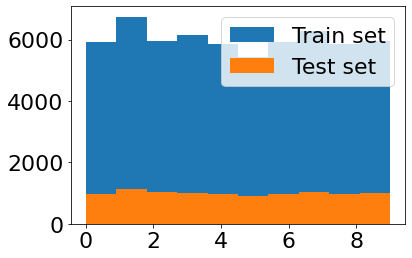

In [192]:
plt.hist(y_train, label='Train set')
plt.hist(y_test, label='Test set')
plt.legend()

In [193]:
def show_image(pixels):
  img = np.reshape(pixels, (28, 28))
  plt.imshow(img, cmap='plasma')

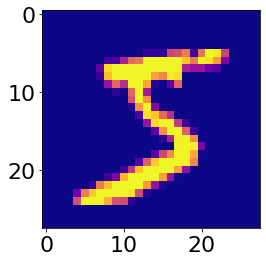

In [194]:
show_image(X_train.iloc[0].values)

In [200]:
y_train.describe()

count    60000.000000
mean         4.453933
std          2.889270
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: train, dtype: float64

In [208]:
pd.concat([y_train.value_counts().sort_index(), y_test.value_counts().sort_index()], axis=1)

,train,test
0,5923,980
1,6742,1135
2,5958,1032
3,6131,1010
4,5842,982
5,5421,892
6,5918,958
7,6265,1028
8,5851,974
9,5949,1009


Text(0.5, 0, '')

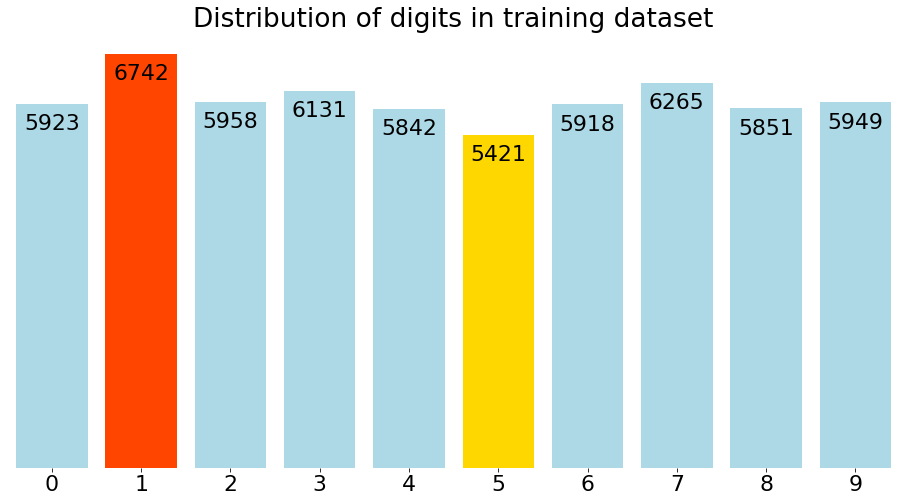

In [218]:
fig1 = plt.figure(figsize=(16, 8))
hist = sns.countplot(data=df_train, x='train', saturation=1, color='lightblue')
# you can search color picker in google, and get hex values of you fav color

patch_h = [patch.get_height() for patch in hist.patches]   
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)
idx_smallest = np.argmin(patch_h)
# np.argmax return the index of largest value of the list

hist.patches[idx_tallest].set_facecolor('orangered')
hist.patches[idx_smallest].set_facecolor('gold')
hist.bar_label(hist.containers[0], padding=-30)
hist.set_title('Distribution of digits in training dataset')
hist.set_frame_on(False)
hist.get_yaxis().set_visible(False)
hist.set_xlabel('')

In [220]:
fig1.add_axes(hist)
fig1.savefig('digit_distribution_train_set.png', facecolor='white')